In [2]:
import pandas as pd
import numpy as np

In [3]:
# orignial data read from ../data folder
data = pd.read_excel("../data/Social_Media_Usage_pivoted.xlsx")

In [4]:
# data infomation
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Platform    176 non-null    object
 1   Dimension   176 non-null    object
 2   Category    176 non-null    object
 3   Percentage  176 non-null    object
dtypes: object(4)
memory usage: 5.6+ KB


In [5]:
# data description
data.describe()

,Platform,Dimension,Category,Percentage
count,176,176,176,176
unique,11,5,16,76
top,Be Real,Age,30-49,25
freq,16,44,11,8


- there are 11 `platfroms`
- there are 5 `Dimensions`

In [6]:
data.head()

,Platform,Dimension,Category,Percentage
0,Be Real,Age,30-49,3
1,Be Real,Age,50-64,1
2,Be Real,Age,65+,<1
3,Be Real,Age,Ages 18-29,12
4,Facebook,Age,30-49,75


In [7]:
# generate table for each Dimesion
def table_tidy (df, Dimension):
    df = df.query('Dimension == @Dimension')
    df = df.drop(columns = ['Dimension'])
    df = df.pivot(index = 'Platform', columns = 'Category', values = 'Percentage').reset_index()
    df.columns.name = None
    return pd.DataFrame(df)

In [8]:
Dimension = data['Dimension'].unique()
Dimension

array(['Age', 'Gender', 'Income', 'Political Affiliation',
       'Race & Ethnicity'], dtype=object)

In [9]:
table_tidy(data, 'Political Affiliation')

,Platform,Dem/Lean Dem,Rep/Lean Rep
0,Be Real,4,4
1,Facebook,67,70
2,Instagram,53,43
3,Linked In,34,29
4,Pinterest,35,35
5,Reddit,25,20
6,Snapchat,28,27
7,Tik Tok,36,30
8,Twitter (X),26,20
9,Whats App,33,25


In [10]:
for i in Dimension:
    print(table_tidy(data, i).head(1))
    print("\n")

  Platform 30-49 50-64 65+ Ages 18-29
0  Be Real     3     1  <1         12


  Platform Men Women
0  Be Real   2     5


  Platform $100,000+ $30,000- $69,999 $70,000- $99,999 Less than $30,000
0  Be Real         5                3                3                 3


  Platform Dem/Lean Dem Rep/Lean Rep
0  Be Real            4            4


  Platform Asian* Black Hispanic White
0  Be Real      9     1        4     3




In [11]:
# read data from csv file skip first 2 rows and last 2 rows and first 2 columns

data2 = pd.read_csv("../data/which_social_media_platforms_are_most_popular_data_2024-01-31.csv"
                    ,skiprows=2
                    ,skipfooter=3)
data2.head()

/var/folders/mg/xcxdf8ds5751wpt36mw0qmrm0000gn/T/ipykernel_7855/1884407188.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  data2 = pd.read_csv("../data/which_social_media_platforms_are_most_popular_data_2024-01-31.csv"


,\t\t\tYear,YouTube,Facebook,Instagram,Pinterest,TikTok,LinkedIn,WhatsApp,Snapchat,Twitter (X),Reddit,BeReal,Nextdoor
0,\t\t8/5/2012,NaN,54%,9%,10%,NaN,16%,NaN,NaN,13%,NaN,NaN,NaN
1,\t\t8/7/2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14%,NaN,NaN,NaN
2,\t\t12/9/2012,NaN,NaN,11%,13%,NaN,NaN,NaN,NaN,13%,NaN,NaN,NaN
3,\t\t12/16/2012,NaN,57%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,\t\t5/19/2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15%,NaN,NaN,NaN


In [12]:
# data clean replace the special characters \t from the column names and replace the special characters \t from the data
data2.columns = data2.columns.str.replace('\t','')
data2 = data2.replace('\t','')
data2.head()

,Year,YouTube,Facebook,Instagram,Pinterest,TikTok,LinkedIn,WhatsApp,Snapchat,Twitter (X),Reddit,BeReal,Nextdoor
0,\t\t8/5/2012,NaN,54%,9%,10%,NaN,16%,NaN,NaN,13%,NaN,NaN,NaN
1,\t\t8/7/2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14%,NaN,NaN,NaN
2,\t\t12/9/2012,NaN,NaN,11%,13%,NaN,NaN,NaN,NaN,13%,NaN,NaN,NaN
3,\t\t12/16/2012,NaN,57%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,\t\t5/19/2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15%,NaN,NaN,NaN


In [13]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Year         16 non-null     object
 1   YouTube      4 non-null      object
 2   Facebook     10 non-null     object
 3   Instagram    10 non-null     object
 4   Pinterest    10 non-null     object
 5   TikTok       2 non-null      object
 6   LinkedIn     9 non-null      object
 7   WhatsApp     4 non-null      object
 8   Snapchat     4 non-null      object
 9   Twitter (X)  15 non-null     object
 10  Reddit       3 non-null      object
 11  BeReal       1 non-null      object
 12  Nextdoor     1 non-null      object
dtypes: object(13)
memory usage: 1.8+ KB


In [14]:
# change the data type of the columns
# convert the Year column to datetime
data2['Year'] = pd.to_datetime(data2['Year'])

# convert the columns to numeric 
for i in data2.columns[1:]:
    data2[i] = data2[i].str.replace('%','').astype(float)/100



In [15]:
data2.tail()

,Year,YouTube,Facebook,Instagram,Pinterest,TikTok,LinkedIn,WhatsApp,Snapchat,Twitter (X),Reddit,BeReal,Nextdoor
11,2016-04-04,NaN,0.68,0.28,0.26,NaN,0.25,NaN,NaN,0.21,NaN,NaN,NaN
12,2018-01-10,0.73,0.68,0.35,0.29,NaN,0.25,0.22,0.27,0.24,NaN,NaN,NaN
13,2019-02-07,0.73,0.69,0.37,0.28,NaN,0.27,0.20,0.24,0.22,0.11,NaN,NaN
14,2021-02-08,0.81,0.69,0.40,0.31,0.21,0.28,0.23,0.25,0.23,0.18,NaN,0.13
15,2023-09-05,0.83,0.68,0.47,0.35,0.33,0.30,0.29,0.27,0.22,0.22,0.03,NaN


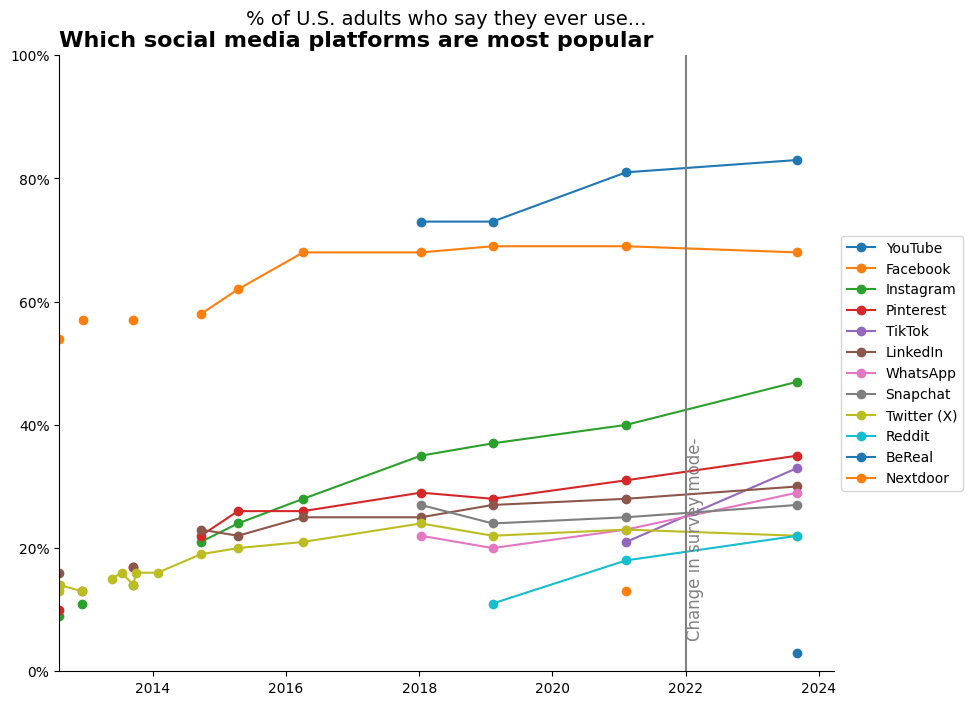

In [16]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
for i in data2.columns[1:]:
    ax.plot(data2['Year'], data2[i], label = i, marker = 'o')
# add a auxiliary line in 2021 year
ax.axvline(x=pd.to_datetime('2022-01-01'), color='grey', linestyle='-')
ax.text(pd.to_datetime('2022-01-01'), 0.05, 'Change in survey mode-', rotation=90, color='grey', fontsize=12, va='bottom')
# set legend on the center left side outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# set the x axis start from 2010
plt.xlim(data2['Year'].min())
# Ensure the y-axis ranges from 0 to 1
ax.set_ylim(0, 1)  
# remove the frame of the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# set the y axis present as percentage from 0% to 100%
ax.yaxis.set_major_formatter(plt.FuncFormatter('{:.0%}'.format))
# Set the title
ax.set_title('Which social media platforms are most popular', fontsize=16, fontweight='bold', loc='left')

# Add subtitle
ax.text(0.5, 1.05, '% of U.S. adults who say they ever use...', fontsize=14, ha='center', transform=ax.transAxes)
plt.show()
    